# Project Friend- A chatbot App

**Import necessary library**

In [41]:
import nltk
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
import json
import pickle

In [44]:
import numpy as np
import pandas as pd

In [45]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.optimizers import SGD
import random

**Set necessary variable and DATA set**

In [9]:
words=[]
classes = []
documents = []
ignore_words = ['?', '!']

data_file = open('intents.json').read()
intents = json.loads(data_file)

In [11]:
type(intents)

dict

In [25]:
type(intents['intents'])

list

# Preprocess data

**we need to perform various preprocessing on the data before we make a machine learning or a deep learning model. Tokenizing is the most basic and first thing you can do on text data. Tokenizing is the process of breaking the whole text into small parts like words.**

In [27]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\SAM\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [28]:
for intent in intents['intents']:
    for pattern in intent['patterns']:
        #tokenize each word
        w = nltk.word_tokenize(pattern)
        words.extend(w)
        #add documents in the corpus
        documents.append((w, intent['tag']))
        # add to our classes list
        if intent['tag'] not in classes:
            classes.append(intent['tag'])

**Now we will lemmatize each word and remove duplicate words from the list.**

In [30]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\SAM\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\wordnet.zip.


True

In [51]:
# lemmatize, lower each word and remove duplicates
words = [lemmatizer.lemmatize(w.lower()) for w in words if w not in ignore_words]
words = sorted(list(set(words)))
# sort classes
classes = sorted(list(set(classes)))
# documents = combination between patterns and intents
print (len(documents), "documents")
# classes = intents
print (len(classes), "classes", classes)
# words = all words, vocabulary
print (len(words), "unique lemmatized words", words)
pickle.dump(words,open('words.pkl','wb'))
pickle.dump(classes,open('classes.pkl','wb'))

47 documents
9 classes ['adverse_drug', 'blood_pressure', 'blood_pressure_search', 'goodbye', 'greeting', 'hospital_search', 'options', 'pharmacy_search', 'thanks']
88 unique lemmatized words ["'s", ',', 'a', 'adverse', 'all', 'anyone', 'are', 'awesome', 'be', 'behavior', 'blood', 'by', 'bye', 'can', 'causing', 'chatting', 'check', 'could', 'data', 'day', 'detail', 'do', 'dont', 'drug', 'entry', 'find', 'for', 'give', 'good', 'goodbye', 'have', 'hello', 'help', 'helpful', 'helping', 'hey', 'hi', 'history', 'hola', 'hospital', 'how', 'i', 'id', 'is', 'later', 'list', 'load', 'locate', 'log', 'looking', 'lookup', 'management', 'me', 'module', 'nearby', 'next', 'nice', 'of', 'offered', 'open', 'patient', 'pharmacy', 'pressure', 'provide', 'reaction', 'related', 'result', 'search', 'searching', 'see', 'show', 'suitable', 'support', 'task', 'thank', 'thanks', 'that', 'there', 'till', 'time', 'to', 'transfer', 'up', 'want', 'what', 'which', 'with', 'you']


# Create training and testing data

In [36]:
# create our training data
training = []
# create an empty array for our output
output_empty = [0] * len(classes)
# training set, bag of words for each sentence
for doc in documents:
    # initialize our bag of words
    bag = []
    # list of tokenized words for the pattern
    pattern_words = doc[0]
    # lemmatize each word - create base word, in attempt to represent related words
    pattern_words = [lemmatizer.lemmatize(word.lower()) for word in pattern_words]
    # create our bag of words array with 1, if word match found in current pattern
for w in words:
    bag.append(1) if w in pattern_words else bag.append(0)
    # output is a '0' for each tag and '1' for current tag (for each pattern)
    output_row = list(output_empty)
    output_row[classes.index(doc[1])] = 1
    training.append([bag, output_row])
# shuffle our features and turn into np.array
random.shuffle(training)
training = np.array(training)
# create train and test lists. X - patterns, Y - intents
train_x = list(training[:,0])
train_y = list(training[:,1])
print("Training data created")

Training data created


# Build model

In [37]:
model = Sequential()

model.add(Dense(128, input_shape=(len(train_x[0]),), activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(len(train_y[0]), activation='softmax'))

sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

In [52]:
#fitting and saving the model 
hist = model.fit(np.array(train_x), np.array(train_y), epochs=200, batch_size=5, verbose=1)
model.save('chatbot_model.h5', hist)
print("model created")

Train on 88 samples
Epoch 1/200
88/88 [==============================] - 6s 65ms/sample - loss: 7.1889e-06 - accuracy: 1.0000
Epoch 2/200
88/88 [==============================] - 0s 626us/sample - loss: 1.2946e-05 - accuracy: 1.0000
Epoch 3/200
88/88 [==============================] - 0s 959us/sample - loss: 4.4055e-05 - accuracy: 1.0000
Epoch 4/200
88/88 [==============================] - 0s 902us/sample - loss: 1.4144e-05 - accuracy: 1.0000
Epoch 5/200
88/88 [==============================] - 0s 442us/sample - loss: 7.4412e-05 - accuracy: 1.0000
Epoch 6/200
88/88 [==============================] - 0s 943us/sample - loss: 6.3079e-06 - accuracy: 1.0000
Epoch 7/200
88/88 [==============================] - 0s 1ms/sample - loss: 3.4755e-05 - accuracy: 1.0000
Epoch 8/200
88/88 [==============================] - 0s 1ms/sample - loss: 5.2503e-06 - accuracy: 1.0000
Epoch 9/200
88/88 [==============================] - 0s 370us/sample - loss: 1.7345e-05 - accuracy: 1.0000
Epoch 10/200
88/88 [==

88/88 [==============================] - 0s 442us/sample - loss: 4.9767e-04 - accuracy: 1.0000
Epoch 77/200
88/88 [==============================] - 0s 453us/sample - loss: 0.0019 - accuracy: 1.0000
Epoch 78/200
88/88 [==============================] - 0s 623us/sample - loss: 7.9481e-04 - accuracy: 1.0000
Epoch 79/200
88/88 [==============================] - 0s 408us/sample - loss: 4.9188e-05 - accuracy: 1.0000
Epoch 80/200
88/88 [==============================] - 0s 918us/sample - loss: 1.6499e-06 - accuracy: 1.0000
Epoch 81/200
88/88 [==============================] - 0s 431us/sample - loss: 5.6431e-06 - accuracy: 1.0000
Epoch 82/200
88/88 [==============================] - 0s 476us/sample - loss: 1.4725e-05 - accuracy: 1.0000
Epoch 83/200
88/88 [==============================] - 0s 487us/sample - loss: 1.1126e-04 - accuracy: 1.0000
Epoch 84/200
88/88 [==============================] - 0s 476us/sample - loss: 9.0956e-05 - accuracy: 1.0000
Epoch 85/200
88/88 [=========================

88/88 [==============================] - 0s 499us/sample - loss: 3.2863e-06 - accuracy: 1.0000
Epoch 152/200
88/88 [==============================] - 0s 533us/sample - loss: 6.1843e-05 - accuracy: 1.0000
Epoch 153/200
88/88 [==============================] - 0s 533us/sample - loss: 5.9032e-06 - accuracy: 1.0000
Epoch 154/200
88/88 [==============================] - 0s 431us/sample - loss: 2.5994e-05 - accuracy: 1.0000
Epoch 155/200
88/88 [==============================] - 0s 431us/sample - loss: 1.2408e-06 - accuracy: 1.0000
Epoch 156/200
88/88 [==============================] - 0s 476us/sample - loss: 8.0038e-05 - accuracy: 1.0000
Epoch 157/200
88/88 [==============================] - 0s 431us/sample - loss: 1.9561e-06 - accuracy: 1.0000
Epoch 158/200
88/88 [==============================] - 0s 431us/sample - loss: 5.5006e-06 - accuracy: 1.0000
Epoch 159/200
88/88 [==============================] - 0s 408us/sample - loss: 2.5417e-04 - accuracy: 1.0000
Epoch 160/200
88/88 [============

In [47]:
model_loss = pd.DataFrame(model.history.history)

In [50]:
model_loss.head()

,loss,accuracy
0,0.869489,0.795455
1,0.011066,1.000000
2,0.000342,1.000000
3,0.000405,1.000000
4,0.001534,1.000000


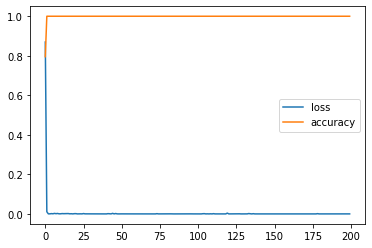

In [48]:
model_loss.plot()

**Accuracy rate is very good.**